https://www.datacamp.com/tutorial/autoencoder-keras-tutorial

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.optimizers import RMSprop
from keras import regularizers, layers
import keras
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
train_df = pd.read_csv("/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/augmented_data.csv")
test_df = pd.read_csv("/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/test_data.csv")
val_df = pd.read_csv("/content/drive/MyDrive/24-25 Academic Year/CS156/Second Pipeline/0. Dataset/val_data.csv")

In [ ]:
# Train
x_train = train_df.drop(['label'], axis=1).values.astype('float32')
y_train = train_df['label'].values

In [ ]:
# Val
x_val = val_df.drop(['label'], axis=1).values.astype('float32')
y_val = val_df['label'].values

In [ ]:
# Test
x_test = test_df.drop(['label'], axis=1).values.astype('float32')
y_test = test_df['label'].values

In [ ]:
# Check shape
x_train.shape

(9240, 4096)

In [ ]:
tf.keras.mixed_precision.set_global_policy('float32')

# Define model parameters
encoding_dim = 32
input_shape = 4096

# Build the model - keeping only the necessary dtype specifications
input_img = keras.Input(shape=(input_shape,), dtype='float32', name='input_layer')

encoded = layers.Dense(
    encoding_dim,
    activation='relu',
    dtype='float32',
    activity_regularizer=regularizers.l1(1e-5),
    name='encoder'
)(input_img)

decoded = layers.Dense(
    input_shape,
    activation='sigmoid',
    dtype='float32',
    name='decoder'
)(encoded)

# Create the autoencoder model
autoencoder = keras.Model(input_img, decoded, name='autoencoder')

# Standard compilation
autoencoder.compile(
    optimizer='adam',
    loss='binary_crossentropy'
)

In [ ]:
history = autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(x_val, x_val))

Epoch 1/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.3215 - val_loss: 0.3052
Epoch 2/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.3196 - val_loss: 0.3047
Epoch 3/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.3193 - val_loss: 0.3042
Epoch 4/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.3186 - val_loss: 0.3038
Epoch 5/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.3184 - val_loss: 0.3033
Epoch 6/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3179 - val_loss: 0.3029
Epoch 7/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.3177 - val_loss: 0.3024
Epoch 8/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3185 - val_loss: 0.3020
Epoch 9/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.3175 - val_loss: 0.3016
Epoch 10/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.3156 - val_loss: 0.3012
Epoch 11/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.3170 - val_loss: 0.3008
Epoch 12/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step

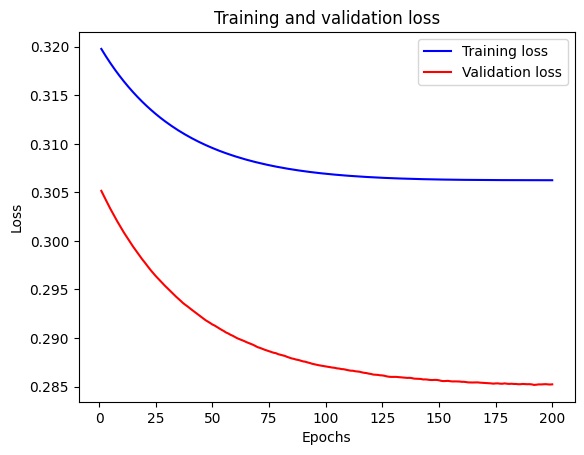

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


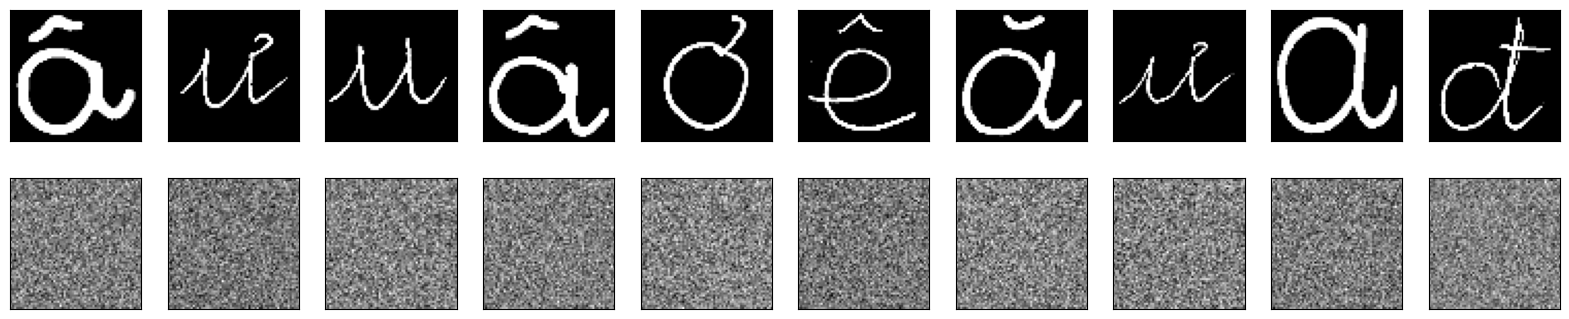

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Epoch 1/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 31s 82ms/step - loss: 0.2888 - val_loss: 0.1687 - learning_rate: 0.0010
Epoch 2/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 22s 77ms/step - loss: 0.1975 - val_loss: 0.1511 - learning_rate: 0.0010
Epoch 3/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 24s 82ms/step - loss: 0.1831 - val_loss: 0.1452 - learning_rate: 0.0010
Epoch 4/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 40s 78ms/step - loss: 0.1742 - val_loss: 0.1342 - learning_rate: 0.0010
Epoch 5/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - loss: 0.1671 - val_loss: 0.1304 - learning_rate: 0.0010
Epoch 6/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 23s 80ms/step - loss: 0.1627 - val_loss: 0.1282 - learning_rate: 0.0010
Epoch 7/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - loss: 0.1599 - val_loss: 0.1250 - learning_rate: 0.0010
Epoch 8/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - loss: 0.1561 - val_loss: 0.1216 - learning_rate: 0.0010
Epoch 9/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 40s 80ms/step - loss: 0.1521 - val_loss: 0.1239 - learn

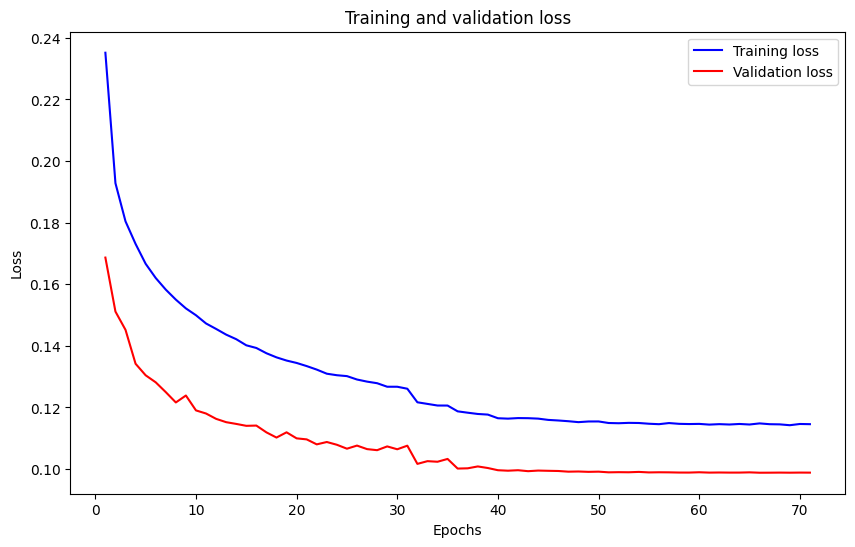

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


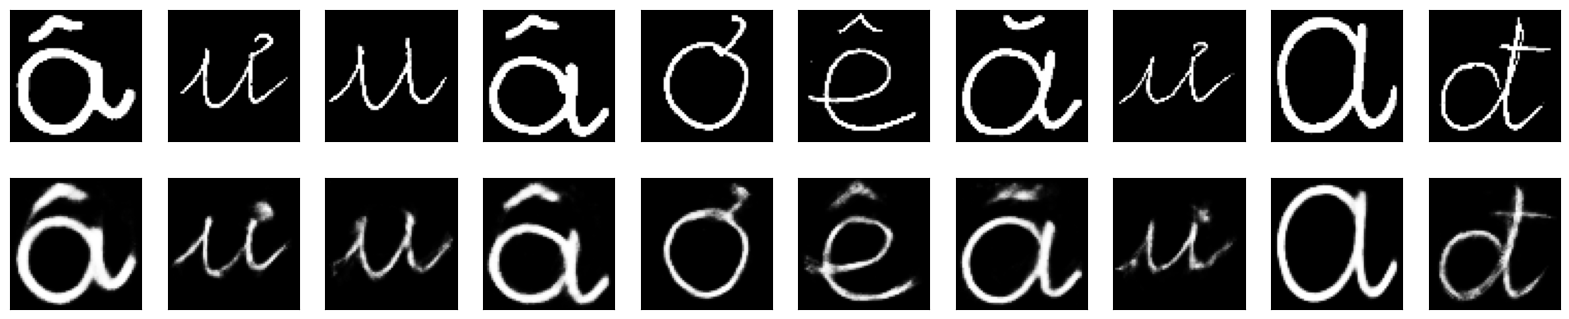

In [ ]:
# Set global policy
tf.keras.mixed_precision.set_global_policy('float32')

# Define model parameters
encoding_dim = 32
input_shape = 4096

# Build the model with deeper architecture
input_img = keras.Input(shape=(input_shape,), dtype='float32')

# Encoder
x = layers.Dense(512)(input_img)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

encoded = layers.Dense(encoding_dim, activity_regularizer=tf.keras.regularizers.l1(1e-6))(x)
x = layers.BatchNormalization()(encoded)
encoded = layers.Activation('relu')(x)

# Decoder
x = layers.Dense(128)(encoded)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Dense(512)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

decoded = layers.Dense(input_shape, activation='sigmoid')(x)

# Create the autoencoder model
autoencoder = keras.Model(input_img, decoded)

# Compile model
autoencoder.compile(
   optimizer=keras.optimizers.Adam(learning_rate=0.001),
   loss='binary_crossentropy'
)

# Add callbacks
early_stopping = keras.callbacks.EarlyStopping(
   monitor='val_loss',
   patience=5,
   restore_best_weights=True
)

lr_reducer = keras.callbacks.ReduceLROnPlateau(
   monitor='val_loss',
   factor=0.5,
   patience=3
)

# Train the model
history = autoencoder.fit(
   x_train,
   x_train,
   epochs=100,
   batch_size=32,
   validation_data=(x_val, x_val),
   callbacks=[early_stopping, lr_reducer],
   verbose=1
)

# Plot training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Function to visualize original and reconstructed images
def plot_reconstructions(autoencoder, x_test, n=10):
   # Get reconstructions
   reconstructions = autoencoder.predict(x_test[:n])

   plt.figure(figsize=(20, 4))
   for i in range(n):
       # Original
       ax = plt.subplot(2, n, i + 1)
       plt.imshow(x_test[i].reshape(64, 64), cmap='gray')
       plt.gray()
       ax.get_xaxis().set_visible(False)
       ax.get_yaxis().set_visible(False)

       # Reconstruction
       ax = plt.subplot(2, n, i + n + 1)
       plt.imshow(reconstructions[i].reshape(64, 64), cmap='gray')
       plt.gray()
       ax.get_xaxis().set_visible(False)
       ax.get_yaxis().set_visible(False)
   plt.show()

# Visualize results
plot_reconstructions(autoencoder, x_test)

In [4]:
# Set global policy
tf.keras.mixed_precision.set_global_policy('float32')

# Define model parameters
encoding_dim = 32
input_shape = 4096

# Build the model with deeper architecture
input_img = keras.Input(shape=(input_shape,), dtype='float32')

# Encoder
x = layers.Dense(512)(input_img)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

encoded = layers.Dense(encoding_dim, activity_regularizer=tf.keras.regularizers.l1(1e-6))(x)
x = layers.BatchNormalization()(encoded)
encoded = layers.Activation('relu')(x)

# Decoder
x = layers.Dense(128)(encoded)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Dense(512)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

decoded = layers.Dense(input_shape, activation='sigmoid')(x)

# Create the autoencoder model
autoencoder = keras.Model(input_img, decoded)

# Compile model
autoencoder.compile(
   optimizer=keras.optimizers.Adam(learning_rate=0.001),
   loss='binary_crossentropy'
)

In [6]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,543,392 (17.33 MB)

 Trainable params: 4,539,744 (17.32 MB)

 Non-trainable params: 3,648 (14.25 KB)